In [1]:
# The normal imports
import numpy as np # efficient numerical computations
import pandas as pd # data structures for data analysis
from numpy.random import randn

# These are the plotting modules adn libraries
import matplotlib as mpl # plotting (both interactive and to files)
import matplotlib.pyplot as plt
import seaborn as sns # extra plot types, elegant and readable plot style

# machine learning algorithms, dataset access
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,RANSACRegressor, ElasticNet, Ridge, Lasso

sns.set_style('whitegrid')

# Command so that plots appear in the iPython Notebook
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
house.drop(['CHAS','RAD'],axis=1,inplace=True)
X = house.drop(['MEDV'], axis=1, inplace=False)
y = house['MEDV']
scaler = StandardScaler()
X= scaler.fit_transform(X)
alphas = [0.001,0.010,0.100,1.000,10.000]

In [4]:
ridge_coeff_df = pd.DataFrame()
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X, y)
    coeff = pd.Series(data=ridge.coef_ )
    colname=alpha
    ridge_coeff_df[colname] = coeff
ridge_coeff_df

,0.001,0.010,0.100,1.000,10.000
0,-0.602383,-0.602368,-0.602221,-0.600774,-0.588771
1,0.929390,0.929320,0.928625,0.921750,0.859738
2,-0.287726,-0.287727,-0.287739,-0.287877,-0.290779
3,-1.687746,-1.687556,-1.685665,-1.666987,-1.501270
4,2.939830,2.939856,2.940115,2.942632,2.961488
5,-0.052531,-0.052550,-0.052739,-0.054609,-0.070969
6,-3.161513,-3.161264,-3.158774,-3.134119,-2.909732
7,0.140313,0.140233,0.139434,0.131546,0.061512
8,-1.889901,-1.889863,-1.889482,-1.885701,-1.851103
9,0.806484,0.806487,0.806512,0.806752,0.807874


In [5]:
lasso_coeff_df = pd.DataFrame()
for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X, y)
    coeff = pd.Series(data=lasso.coef_)
    colname=alpha
    lasso_coeff_df[colname] = coeff
lasso_coeff_df

,0.001,0.010,0.100,1.000,10.000
0,-0.599709,-0.575196,-0.468970,-0.000000,-0.0
1,0.928047,0.914682,0.663783,0.000000,0.0
2,-0.283808,-0.246570,-0.097257,-0.000000,-0.0
3,-1.682934,-1.639010,-1.341018,-0.000000,-0.0
4,2.940166,2.944162,2.974071,2.713352,0.0
5,-0.050366,-0.032073,-0.000000,-0.000000,-0.0
6,-3.153852,-3.082985,-2.453958,-0.000000,0.0
7,0.133366,0.069993,-0.000000,-0.000000,-0.0
8,-1.888048,-1.871745,-1.850519,-1.343548,-0.0
9,0.805318,0.795156,0.749972,0.180954,0.0


In [6]:
en_coeff_df = pd.DataFrame()
for alpha in alphas:
    en = ElasticNet(alpha = alpha)
    en.fit(X, y)
    coeff = pd.Series(data=en.coef_ )
    colname=alpha
    en_coeff_df[colname] = coeff
en_coeff_df

,0.001,0.010,0.100,1.000,10.000
0,-0.600647,-0.585277,-0.531592,-0.352666,-0.000000
1,0.926786,0.903556,0.669305,0.066465,0.000000
2,-0.285843,-0.268760,-0.244716,-0.234977,-0.000000
3,-1.680078,-1.612530,-1.190380,-0.207850,-0.000000
4,2.940711,2.948282,2.968491,2.384196,0.203314
5,-0.051974,-0.047179,-0.000000,-0.000000,-0.000000
6,-3.150754,-3.055384,-2.297972,-0.000000,0.000000
7,0.134636,0.084394,-0.031431,-0.324614,-0.000000
8,-1.887906,-1.870406,-1.797817,-1.298200,-0.000000
9,0.805967,0.801393,0.778814,0.476117,0.000000


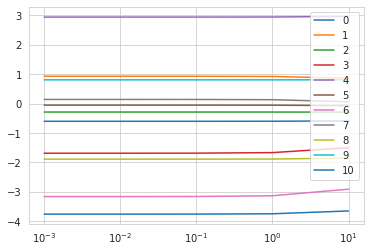

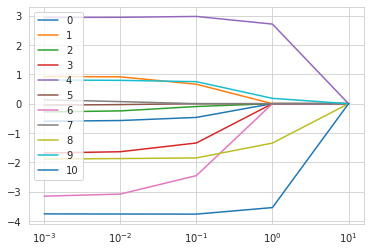

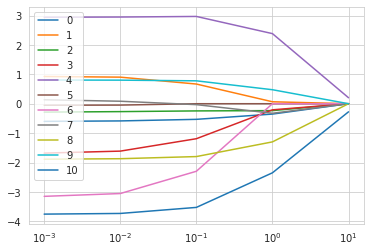

In [7]:
for df in [ridge_coeff_df,lasso_coeff_df,en_coeff_df]:
  tdf=df.T
  tdf.plot()
  plt.semilogx()